In [11]:
import pandas as pd 
fore = pd.read_csv("foreclosures.tsv", sep="\t")
totalForeclosureAmount = fore['amount'].sum()
averageForeclosureAmount = fore['amount'].mean()
print(f"Total Foreclosure Debt for Allegheny County: {totalForeclosureAmount}")
print(f"Average Foreclosure Debt for Allegheny County: {averageForeclosureAmount}")

Total Foreclosure Debt for Allegheny County: 6823024851.62
Average Foreclosure Debt for Allegheny County: 176369.3545887401


In [3]:
import pandas as pd

df = pd.read_csv('foreclosures.tsv', 
                 sep='\t', encoding='utf-8-sig')

print("Dataset Overview:")
print(f"Total foreclosures: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# total
foreclosures_by_area = df['municipality'].value_counts()

print("\n" + "="*60)
print("FORECLOSURE COUNTS BY AREA")
print("="*60)
print(foreclosures_by_area.head(20))

# best
print("\n" + "="*60)
print("BEST NEIGHBORHOODS (Fewest Foreclosures)")
print("="*60)
print(foreclosures_by_area.tail(20))

print("\n" + "="*60)
print("STATISTICS")
print("="*60)
print(f"Total unique municipalities: {df['municipality'].nunique()}")
print(f"Average foreclosures per municipality: {foreclosures_by_area.mean():.2f}")
print(f"Median foreclosures per municipality: {foreclosures_by_area.median():.2f}")

best_neighborhood = foreclosures_by_area.idxmin()
best_neighborhood_count = foreclosures_by_area.min()

print("\n" + "="*60)
print("CONCLUSION")
print("="*60)
print(f"Best neighborhood (fewest foreclosures): {best_neighborhood}")
print(f"Number of foreclosures: {best_neighborhood_count}")

# worst
print("\n" + "="*60)
print("WORST NEIGHBORHOODS (Most Foreclosures)")
print("="*60)
worst_5 = foreclosures_by_area.head(5)
for area, count in worst_5.items():
    print(f"{area}: {count} foreclosures")

Dataset Overview:
Total foreclosures: 39343

Columns: ['_id', 'pin', 'block_lot', 'filing_date', 'case_id', 'municipality', 'ward', 'docket_type', 'amount', 'plaintiff', 'last_activity']

First few rows:
   _id               pin block_lot filing_date       case_id  \
0    1  1222S00215000000  1222S215  2009-01-02  GD-09-000087   
1    2  1127N00019000000   1127N19  2009-01-02  GD-09-000093   
2    3  0690C00043000000    690C43  2009-01-02  GD-09-000110   
3    4  1414S00194000000  1414S194  2009-01-02  GD-09-000111   
4    5  0131D00016000000    131D16  2009-01-02  GD-09-000112   

          municipality  ward                    docket_type    amount  \
0        Tarentum Boro   NaN                 Sheriff Return  61821.09   
1   Elizabeth Township   NaN         Praecipe to Substitute  24531.41   
2  N. Fayette Township   NaN                 Sheriff Return  21787.83   
3   Elizabeth Township   NaN  Certificate-Recorder of Deeds  63072.46   
4       Homestead Boro   NaN               Def

Dataset Overview:
Total foreclosures: 39343
Total unique municipalities: 131


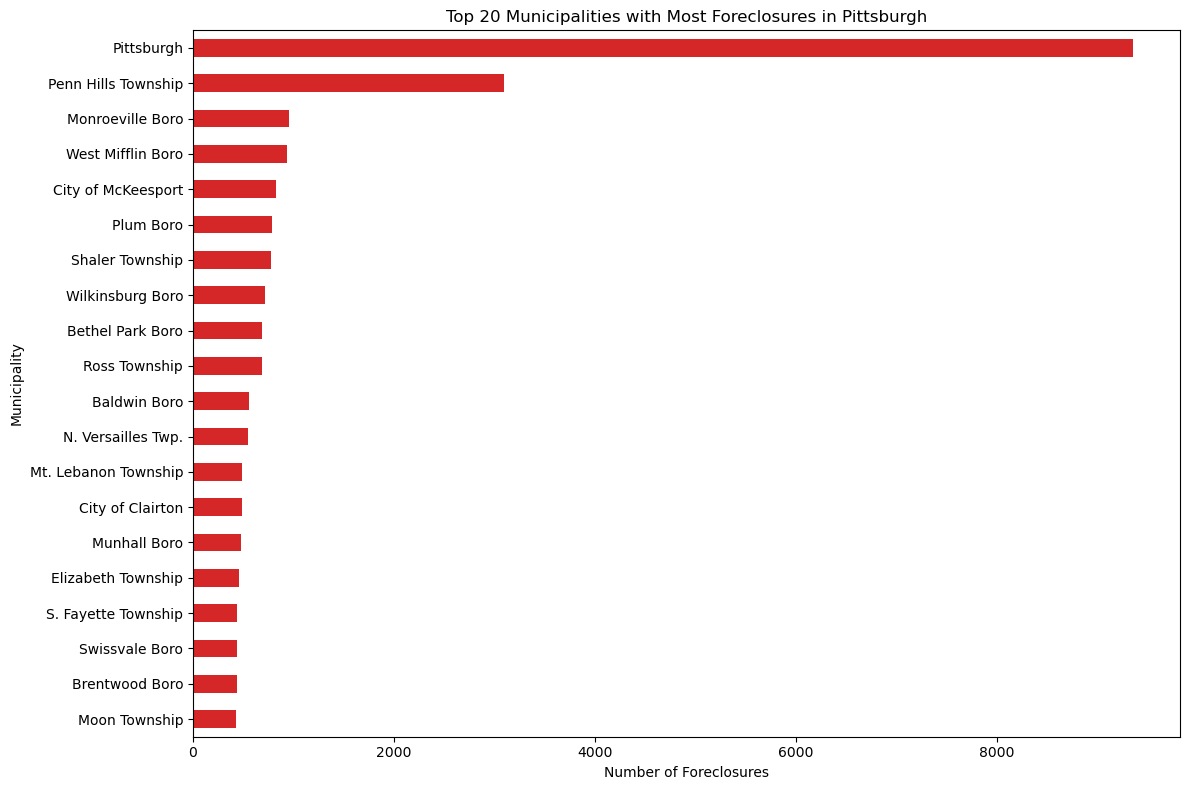

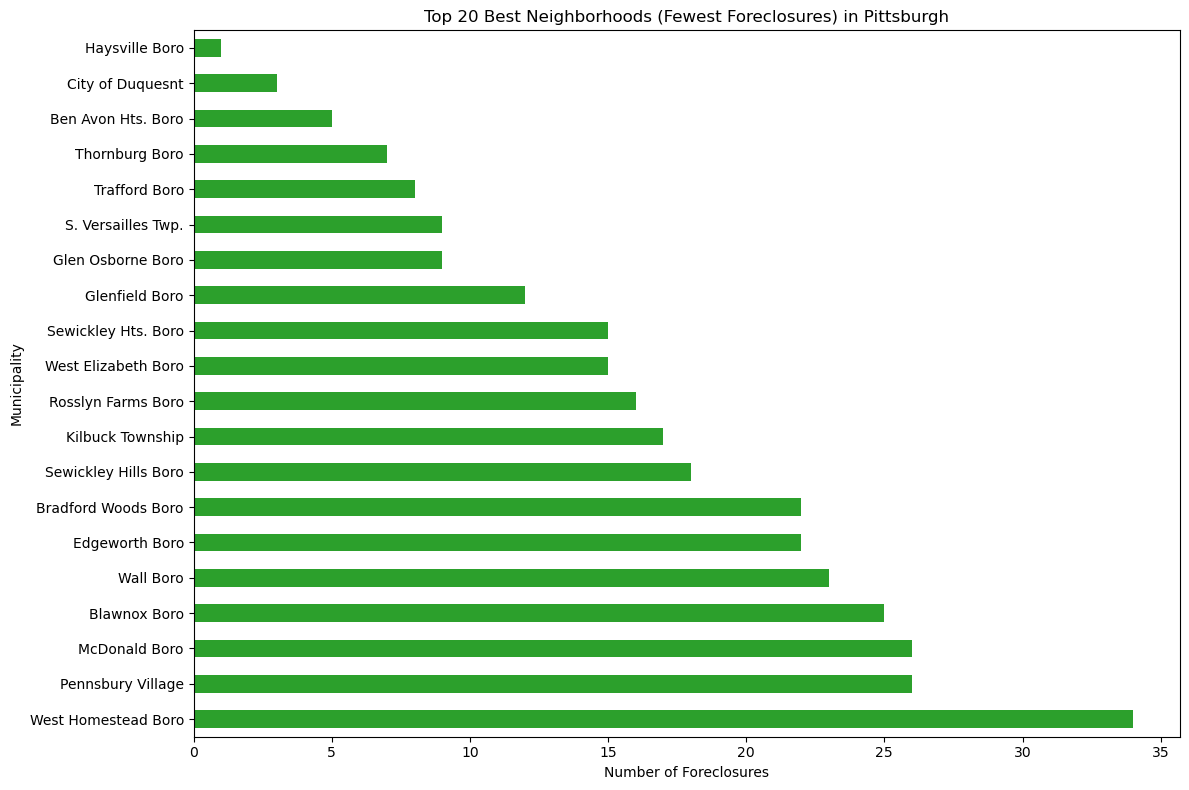

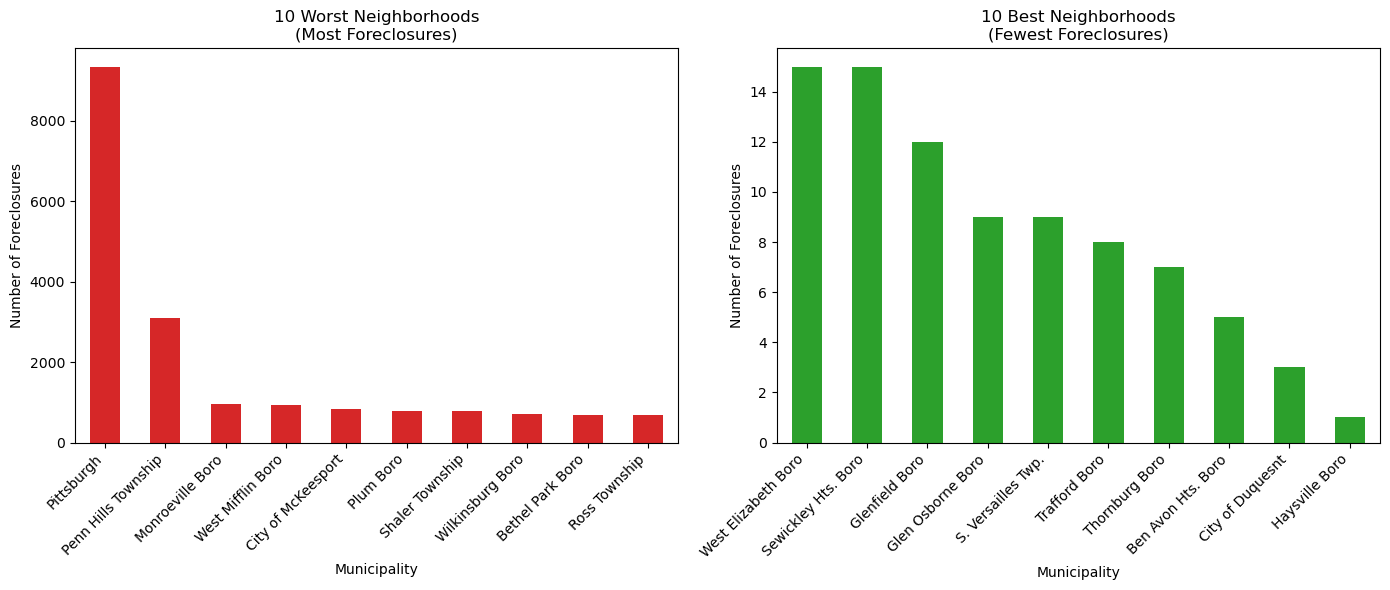


BEST NEIGHBORHOOD
Haysville Boro: 1 foreclosure(s)

WORST NEIGHBORHOOD
Pittsburgh: 9355 foreclosures


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('foreclosures.tsv', 
                 sep='\t', encoding='utf-8-sig')

# total foreclosures
foreclosures_by_area = df['municipality'].value_counts()

print("Dataset Overview:")
print(f"Total foreclosures: {len(df)}")
print(f"Total unique municipalities: {df['municipality'].nunique()}")

# 20 worst
plt.figure(figsize=(12, 8))
foreclosures_by_area.head(20).plot(kind='barh', color='#d62728')
plt.xlabel('Number of Foreclosures')
plt.ylabel('Municipality')
plt.title('Top 20 Municipalities with Most Foreclosures in Pittsburgh')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 20 best
plt.figure(figsize=(12, 8))
foreclosures_by_area.tail(20).plot(kind='barh', color='#2ca02c')
plt.xlabel('Number of Foreclosures')
plt.ylabel('Municipality')
plt.title('Top 20 Best Neighborhoods (Fewest Foreclosures) in Pittsburgh')
plt.tight_layout()
plt.show()

#comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
foreclosures_by_area.head(10).plot(kind='bar', color='#d62728')
plt.xlabel('Municipality')
plt.ylabel('Number of Foreclosures')
plt.title('10 Worst Neighborhoods\n(Most Foreclosures)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
foreclosures_by_area.tail(10).plot(kind='bar', color='#2ca02c')
plt.xlabel('Municipality')
plt.ylabel('Number of Foreclosures')
plt.title('10 Best Neighborhoods\n(Fewest Foreclosures)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("BEST NEIGHBORHOOD")
print("="*60)
best_neighborhood = foreclosures_by_area.idxmin()
best_neighborhood_count = foreclosures_by_area.min()
print(f"{best_neighborhood}: {best_neighborhood_count} foreclosure(s)")

print("\n" + "="*60)
print("WORST NEIGHBORHOOD")
print("="*60)
worst_neighborhood = foreclosures_by_area.idxmax()
worst_neighborhood_count = foreclosures_by_area.max()
print(f"{worst_neighborhood}: {worst_neighborhood_count} foreclosures")